In [ ]:
!pip install kaggle

In [ ]:
import numpy as np #NumPy adalah library yang menyediakan dukungan untuk array dan operasi matematika pada array.
import pandas as pd #Pandas adalah library yang menyediakan struktur data tingkat tinggi, seperti DataFrame, yang mempermudah manipulasi dan analisis data.

In [ ]:
import seaborn as sns #library Python yang digunakan untuk membuat visualisasi data statistik
import matplotlib.pyplot as plt #library visualisasi data Python yang paling populer
%matplotlib inline
sns.set_style("darkgrid") #gaya plot yang digunakan oleh Seaborn

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulrezak","key":"9d02496a35e09c37bb67c141d33e6823"}'}

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "abdulrezak"
os.environ['KAGGLE_KEY'] = "7bfdaf129e69d2b82caf477094956b76"


In [ ]:
!kaggle datasets download -d joebeachcapital/loan-default

  0% 0.00/2.80M [00:00<?, ?B/s]
100% 2.80M/2.80M [00:00<00:00, 30.1MB/s]


In [ ]:
import zipfile
import os

# Tentukan path dataset yang diunduh
dataset_zip_path = '/content/loan-default.zip'

# Tentukan direktori tempat Anda ingin mengekstrak dataset
extracted_path = '/content/loan-default'

# Mengekstrak dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Daftar semua file yang berhasil diekstrak
extracted_files = os.listdir(extracted_path)
print("Dataset berhasil diekstrak:", extracted_files)


Dataset berhasil diekstrak: ['Anonymize_Loan_Default_data.csv']


# Data Overview and Problem Identification

In [ ]:
df = pd.read_csv('/content/loan-default/Anonymize_Loan_Default_data.csv', encoding='latin1', index_col=0)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [ ]:
for col in df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
repay_fail


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38480 non-null  int64  
 1   member_id               38480 non-null  int64  
 2   loan_amnt               38479 non-null  float64
 3   funded_amnt             38479 non-null  float64
 4   funded_amnt_inv         38479 non-null  float64
 5   term                    38480 non-null  object 
 6   int_rate                38480 non-null  float64
 7   installment             38479 non-null  float64
 8   emp_length              37487 non-null  object 
 9   home_ownership          38480 non-null  object 
 10  annual_inc              38478 non-null  float64
 11  verification_status     38480 non-null  object 
 12  issue_d                 38480 non-null  object 
 13  loan_status             38480 non-null  object 
 14  purpose                 38480 non-null  obj

In [ ]:
print(df.head())

       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
2       2          2        0.0          0.0              0.0  36 months   
3  545583     703644     2500.0       2500.0           2500.0  36 months   
4  532101     687836     5000.0       5000.0           5000.0  36 months   
5  877788    1092507     7000.0       7000.0           7000.0  36 months   
6  875406    1089981     2000.0       2000.0           2000.0  36 months   

   int_rate  installment emp_length home_ownership  ...  total_acc  \
2      0.00         0.00   < 1 year           RENT  ...        1.0   
3     13.98        85.42    4 years           RENT  ...       10.0   
4     15.95       175.67    4 years           RENT  ...       15.0   
5      9.91       225.58  10+ years       MORTGAGE  ...       20.0   
6      5.42        60.32  10+ years           RENT  ...       15.0   

   total_pymnt total_pymnt_inv total_rec_prncp total_rec_int last_pymnt_d  \
2     0.000000            0.00            0.0

In [ ]:
df.shape

(38480, 36)

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,...,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,...,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,...,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,...,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,...,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,...,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,...,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


Insights from Data Browsing

*   There are 36 columns, 38480 rows
*   There are 14 of object columns, 19 of float64 columns and 3 of int64 columns
*   Labelled column named repay_fail








# Data Cleaning

Fixing Duplicated Values

In [ ]:
# Memeriksa total baris yang terduplikasi
df.duplicated().sum()

0

 Fixing NA Values

In [ ]:
# Memeriksa total nilai yang hilang untuk setiap kolom

df.isna().sum()

id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_rec_int                 1
last_pym

<Axes: >

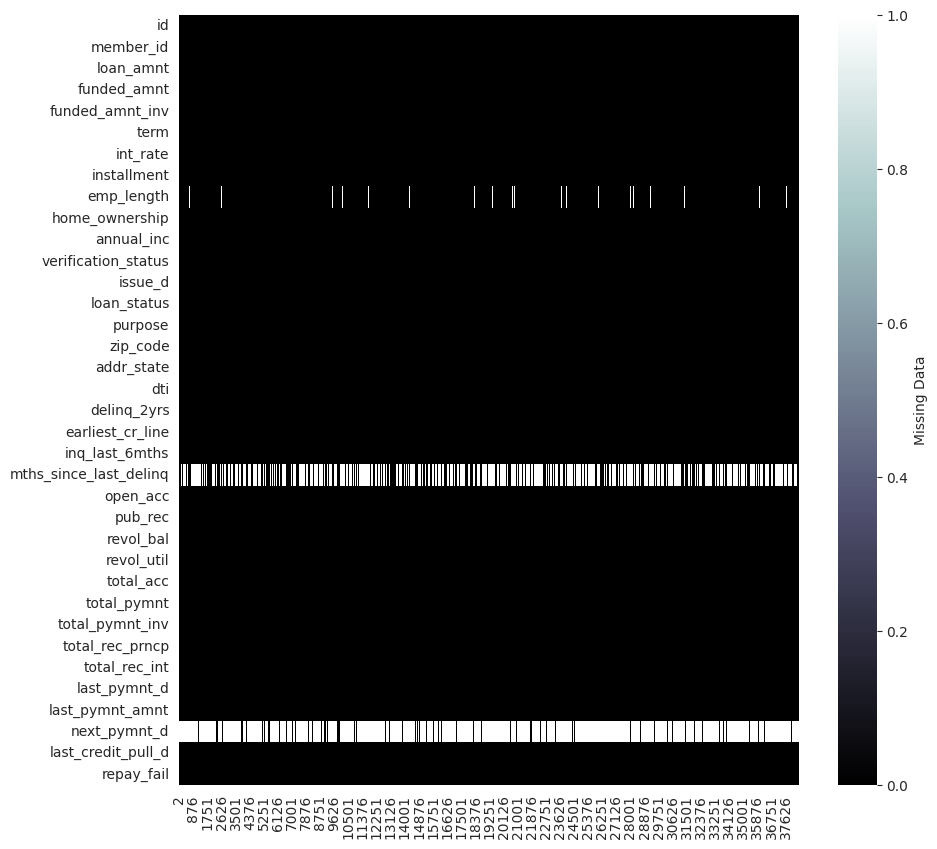

In [ ]:
# Visualisasikan nilai yang hilang menggunakan Heatmap seaborn

plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="bone",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
#dropping columns yang kehilangan lebih dari setengah jumlah nilai
clean_df = df.drop(['next_pymnt_d','mths_since_last_delinq'],axis=1)

#dropping kolom identitas
clean_df = clean_df.drop(['member_id','id','zip_code','addr_state'],axis=1)

#dropping kolom berlabel
clean_df = clean_df.drop(['repay_fail'],axis=1)

In [ ]:
#memperbaiki kolom emp_length

clean_df['emp_length'] = clean_df['emp_length'].replace(' years?', '', regex=True).replace('<', '', regex=True).replace('10+', '10', regex=True)
clean_df['emp_length'] = pd.to_numeric(clean_df['emp_length'], errors='coerce')
clean_df['emp_length'] = clean_df['emp_length'].fillna(0)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38479 non-null  float64
 1   funded_amnt          38479 non-null  float64
 2   funded_amnt_inv      38479 non-null  float64
 3   term                 38480 non-null  object 
 4   int_rate             38480 non-null  float64
 5   installment          38479 non-null  float64
 6   emp_length           38480 non-null  float64
 7   home_ownership       38480 non-null  object 
 8   annual_inc           38478 non-null  float64
 9   verification_status  38480 non-null  object 
 10  issue_d              38480 non-null  object 
 11  loan_status          38480 non-null  object 
 12  purpose              38480 non-null  object 
 13  dti                  38480 non-null  float64
 14  delinq_2yrs          38479 non-null  float64
 15  earliest_cr_line     38480 non-null  obje

In [ ]:
#mengisi nilai kosong dengan nilai rata-rata.

for column in clean_df.columns:
    if clean_df[column].dtype == 'float64':  # Meriksa apakah kolom memiliki tipe d numerik
        clean_df[column] = clean_df[column].fillna(clean_df[column].mean())

In [ ]:
clean_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
2,0.0,0.0,0.0,36 months,0.00,0.00,1.0,RENT,0.0,Not Verified,...,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07
3,2500.0,2500.0,2500.0,36 months,13.98,85.42,4.0,RENT,20004.0,Not Verified,...,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16
4,5000.0,5000.0,5000.0,36 months,15.95,175.67,4.0,RENT,59000.0,Not Verified,...,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12
5,7000.0,7000.0,7000.0,36 months,9.91,225.58,0.0,MORTGAGE,53796.0,Not Verified,...,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14
6,2000.0,2000.0,2000.0,36 months,5.42,60.32,0.0,RENT,30000.0,Not Verified,...,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16


Fixing Object Values

In [ ]:
clean_df.select_dtypes(include='object')

,term,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
2,36 months,RENT,Not Verified,Dec-99,Charged Off,major_purchase,Jan-01,0.00%,Jan-07,Jan-07
3,36 months,RENT,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,Aug-05,21.30%,Jul-13,Jun-16
4,36 months,RENT,Not Verified,Jun-10,Charged Off,debt_consolidation,Apr-94,99.90%,Nov-11,Mar-12
5,36 months,MORTGAGE,Not Verified,Sep-11,Fully Paid,other,Mar-98,47.20%,Mar-14,Mar-14
6,36 months,RENT,Not Verified,Sep-11,Fully Paid,debt_consolidation,Jan-75,0%,Feb-14,Jun-16
...,...,...,...,...,...,...,...,...,...,...
38476,36 months,RENT,Verified,Aug-11,Fully Paid,credit_card,Jan-00,73.50%,Aug-14,Jun-16
38477,36 months,RENT,Source Verified,Aug-11,Fully Paid,credit_card,Apr-99,39.70%,Sep-14,Jun-16
38478,60 months,MORTGAGE,Source Verified,May-10,Fully Paid,debt_consolidation,Dec-95,62.20%,Jun-13,Feb-16
38479,36 months,RENT,Not Verified,Jul-11,Fully Paid,debt_consolidation,Jul-07,53.30%,Aug-14,Sep-15


In [ ]:
#Mengganti kolom menjadi tipe data float64

clean_df['term'].replace("36 months", '36', inplace = True)
clean_df['term'].replace("60 months", '60', inplace = True)
clean_df['term'] = clean_df['term'].astype(float)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38480 non-null  float64
 1   funded_amnt          38480 non-null  float64
 2   funded_amnt_inv      38480 non-null  float64
 3   term                 38480 non-null  float64
 4   int_rate             38480 non-null  float64
 5   installment          38480 non-null  float64
 6   emp_length           38480 non-null  float64
 7   home_ownership       38480 non-null  object 
 8   annual_inc           38480 non-null  float64
 9   verification_status  38480 non-null  object 
 10  issue_d              38480 non-null  object 
 11  loan_status          38480 non-null  object 
 12  purpose              38480 non-null  object 
 13  dti                  38480 non-null  float64
 14  delinq_2yrs          38480 non-null  float64
 15  earliest_cr_line     38480 non-null  obje

In [ ]:
#memperbaiki kolom revol_util

clean_df['revol_util'] = clean_df['revol_util'].replace('%', '', regex=True)
clean_df['revol_util'] = clean_df['revol_util'].apply(pd.to_numeric, errors='coerce')
clean_df['revol_util'] = clean_df['revol_util'].fillna(0)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38480 non-null  float64
 1   funded_amnt          38480 non-null  float64
 2   funded_amnt_inv      38480 non-null  float64
 3   term                 38480 non-null  float64
 4   int_rate             38480 non-null  float64
 5   installment          38480 non-null  float64
 6   emp_length           38480 non-null  float64
 7   home_ownership       38480 non-null  object 
 8   annual_inc           38480 non-null  float64
 9   verification_status  38480 non-null  object 
 10  issue_d              38480 non-null  object 
 11  loan_status          38480 non-null  object 
 12  purpose              38480 non-null  object 
 13  dti                  38480 non-null  float64
 14  delinq_2yrs          38480 non-null  float64
 15  earliest_cr_line     38480 non-null  obje

In [ ]:
#dropping redundant object columns
clean_df = clean_df.drop(['issue_d','earliest_cr_line',
                          'last_pymnt_d','last_credit_pull_d'],axis=1)

In [ ]:
clean_df.select_dtypes(include='object')

,home_ownership,verification_status,loan_status,purpose
2,RENT,Not Verified,Charged Off,major_purchase
3,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,other
4,RENT,Not Verified,Charged Off,debt_consolidation
5,MORTGAGE,Not Verified,Fully Paid,other
6,RENT,Not Verified,Fully Paid,debt_consolidation
...,...,...,...,...
38476,RENT,Verified,Fully Paid,credit_card
38477,RENT,Source Verified,Fully Paid,credit_card
38478,MORTGAGE,Source Verified,Fully Paid,debt_consolidation
38479,RENT,Not Verified,Fully Paid,debt_consolidation


In [ ]:
#label encoder 'home_ownership','loan_status','purpose','verification_status'

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in clean_df.select_dtypes(include='object').columns:
    clean_df[column] = label_encoder.fit_transform(clean_df[column])

clean_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
2,0.0,0.0,0.00000,36.0,0.00,0.00,1.0,4,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00
3,2500.0,2500.0,2500.00000,36.0,13.98,85.42,4.0,4,20004.0,0,...,7.0,0.0,981.0,21.3,10.0,3075.291779,3075.29,2500.00,575.29,90.85
4,5000.0,5000.0,5000.00000,36.0,15.95,175.67,4.0,4,59000.0,0,...,7.0,0.0,18773.0,99.9,15.0,2948.760000,2948.76,1909.02,873.81,175.67
5,7000.0,7000.0,7000.00000,36.0,9.91,225.58,0.0,0,53796.0,0,...,7.0,0.0,3269.0,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27
6,2000.0,2000.0,2000.00000,36.0,5.42,60.32,0.0,4,30000.0,0,...,7.0,0.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38476,3000.0,3000.0,3000.00000,36.0,11.99,99.63,3.0,4,74250.0,2,...,12.0,0.0,16550.0,73.5,22.0,3586.619764,3586.62,3000.00,586.62,100.30
38477,10400.0,10400.0,10400.00000,36.0,13.49,352.88,9.0,4,62000.0,1,...,21.0,0.0,16898.0,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,393.08
38478,16000.0,10550.0,10531.35818,60.0,14.96,250.77,0.0,0,95088.0,1,...,9.0,1.0,10386.0,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,5439.96
38479,10000.0,10000.0,10000.00000,36.0,16.89,355.99,1.0,4,48720.0,0,...,8.0,0.0,7301.0,53.3,12.0,12815.178320,12815.18,10000.00,2815.18,380.63


In [ ]:
clean_df.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38480 non-null  float64
 1   funded_amnt          38480 non-null  float64
 2   funded_amnt_inv      38480 non-null  float64
 3   term                 38480 non-null  float64
 4   int_rate             38480 non-null  float64
 5   installment          38480 non-null  float64
 6   emp_length           38480 non-null  float64
 7   home_ownership       38480 non-null  int64  
 8   annual_inc           38480 non-null  float64
 9   verification_status  38480 non-null  int64  
 10  loan_status          38480 non-null  int64  
 11  purpose              38480 non-null  int64  
 12  dti                  38480 non-null  float64
 13  delinq_2yrs          38480 non-null  float64
 14  inq_last_6mths       38480 non-null  float64
 15  open_acc             38480 non-null  floa

Insights from Data Cleaning

*   data ini memiliki 4 kolom yang dikodekan dengan label dan 21 kolom float64
*   11 kolom dihilangkan untuk dibersihkan
*   Kami berhasil mengisi semua nilai NA


# Exploratory Data Analysis (EDA)

Loan Default Overview

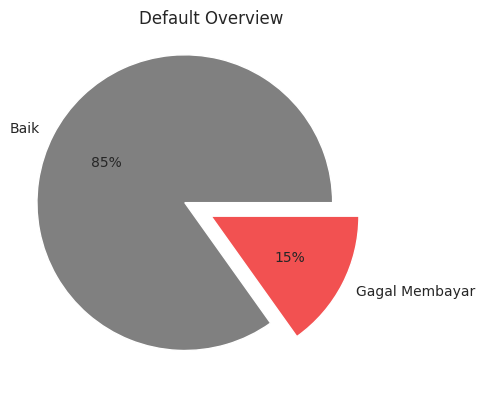

In [ ]:
#visualizing loan default percentage in a pie chart

loan_default = df['repay_fail'].value_counts(normalize=True)

plt.pie(loan_default, labels = ['Baik', 'Gagal Membayar'], explode = [0.2, 0], colors = ["gray", "#F25151"], autopct='%1.0f%%')
plt.title('Default Overview')
plt.show()

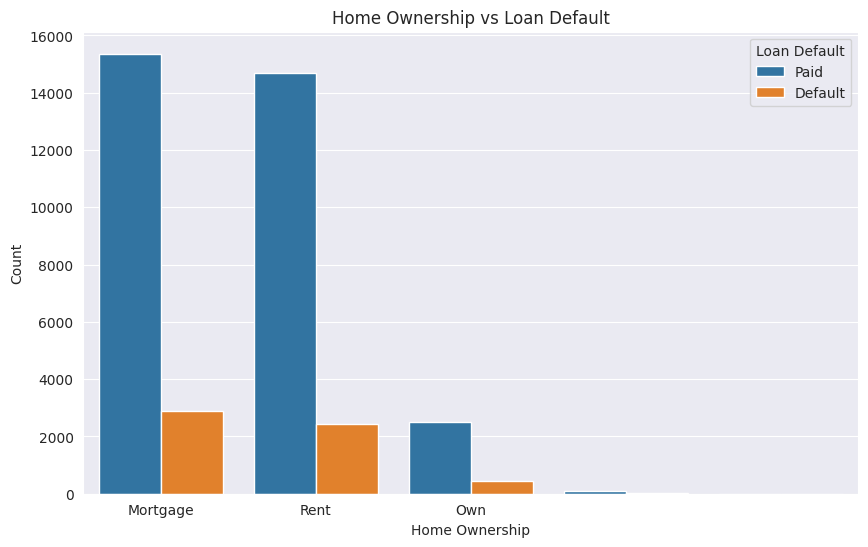

In [ ]:
# Analisis Exploratif Data
# Hubungan antara kepemilikan rumah (Home Ownership) dan gagal bayar pinjaman (Loan Default)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='home_ownership', hue='repay_fail')
plt.title('Home Ownership vs Loan Default')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Default', labels=['Paid', 'Default'])
plt.xticks(ticks=[0, 1, 2], labels=['Mortgage', 'Rent', 'Own'])
plt.show()


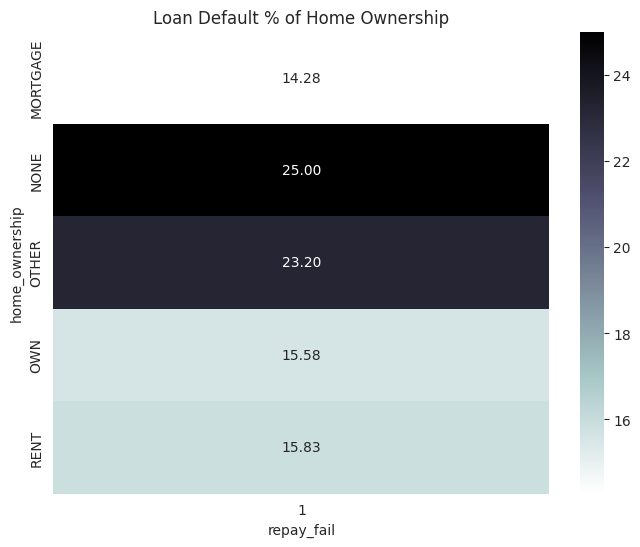

In [ ]:
# Create a contingency table
default_home_contingencytable = pd.crosstab(df['home_ownership'], df['repay_fail'], margins=True, margins_name='Total')

# Calculate percentages along columns
default_home = (default_home_contingencytable.div(default_home_contingencytable['Total'], axis=0) * 100).round(2)

# Drop the 'Total' column (optional)
default_home = default_home.drop('Total', axis=1)
default_home = default_home.drop(0, axis=1)
default_home = default_home.drop('Total', axis=0)

# Visualing the result
plt.figure(figsize=(8, 6))
sns.heatmap(default_home, annot=True, cmap="bone_r", fmt=".2f", cbar=True)
plt.title("Loan Default % of Home Ownership")
plt.show()

Loan purpose vs Loan Default

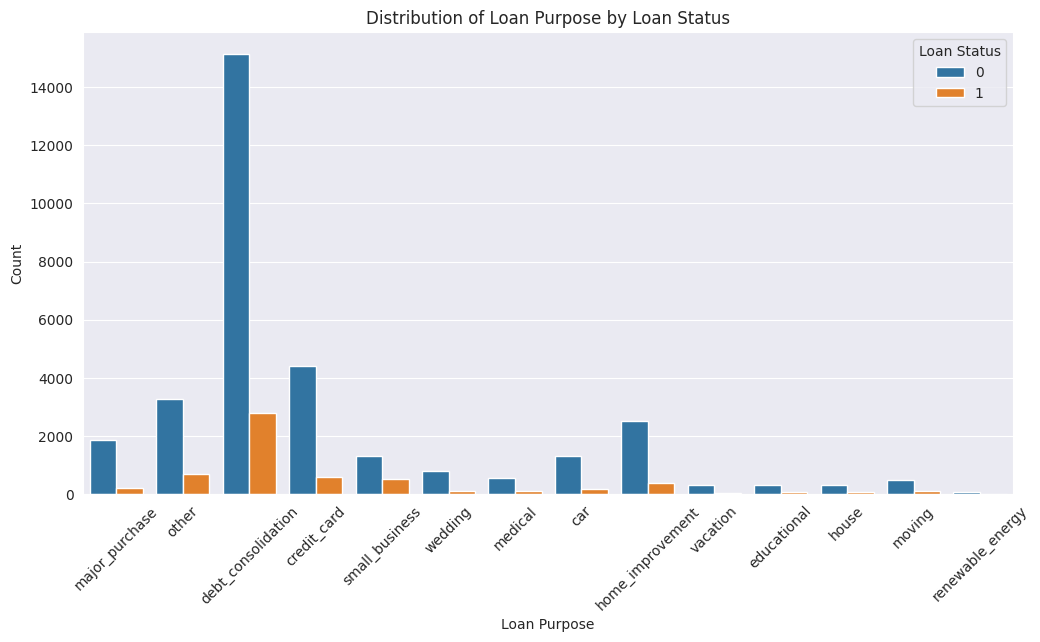

In [ ]:
# Visualisasi distribusi tujuan pinjaman
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=df, hue='repay_fail')
plt.title('Distribution of Loan Purpose by Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

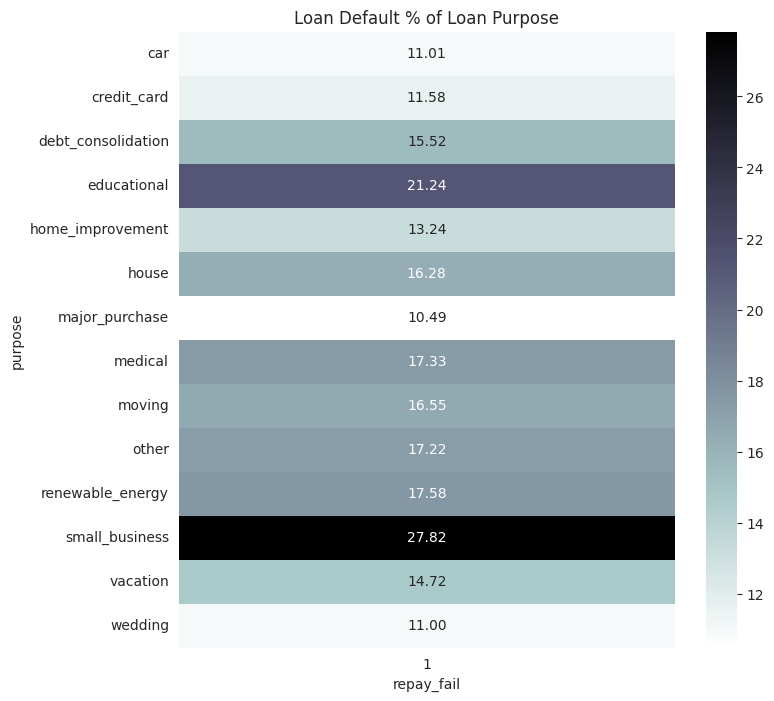

In [ ]:
# Create a contingency table
default_purpose_contingencytable = pd.crosstab(df['purpose'], df['repay_fail'], margins=True, margins_name='Total')

# Calculate percentages along columns
default_purpose = (default_purpose_contingencytable.div(default_purpose_contingencytable['Total'], axis=0) * 100).round(2)

# Drop the 'Total' column (optional)
default_purpose = default_purpose.drop('Total', axis=1)
default_purpose = default_purpose.drop(0, axis=1)
default_purpose = default_purpose.drop('Total', axis=0)

# Visualing the result
plt.figure(figsize=(8, 8))
sns.heatmap(default_purpose, annot=True, cmap="bone_r", fmt=".2f", cbar=True)
plt.title("Loan Default % of Loan Purpose")
plt.show()

Verification Status vs Loan Default

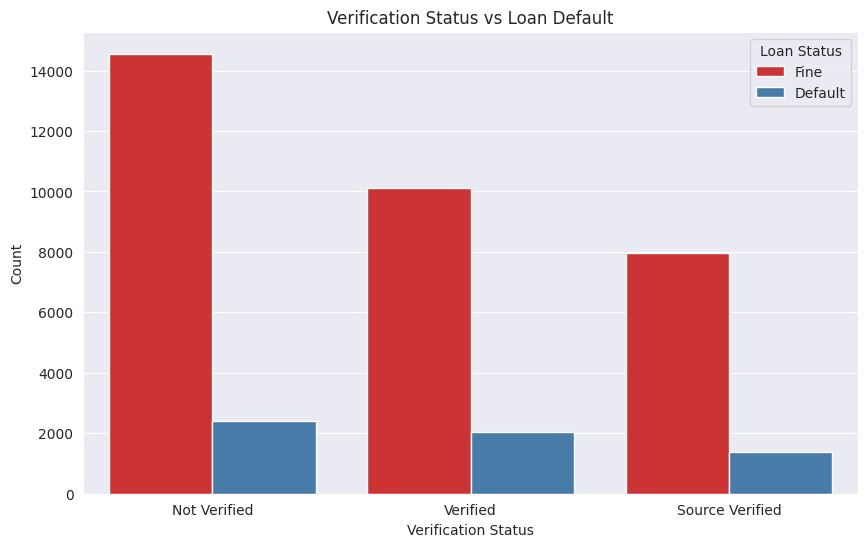

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='repay_fail', data=df, palette='Set1')
plt.title('Verification Status vs Loan Default')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Fine', 'Default'])
plt.show()

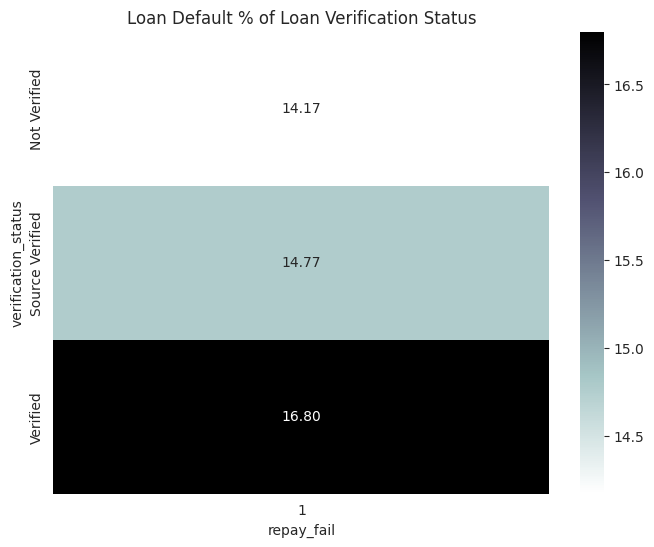

In [ ]:
# Create a contingency table
default_status_contingencytable = pd.crosstab(df['verification_status'], df['repay_fail'], margins=True, margins_name='Total')

# Calculate percentages along columns
default_status = (default_status_contingencytable.div(default_status_contingencytable['Total'], axis=0) * 100).round(2)

# Drop the 'Total' column (optional)
default_status = default_status.drop('Total', axis=1)
default_status = default_status.drop(0, axis=1)
default_status = default_status.drop('Total', axis=0)

# Visualing the result
plt.figure(figsize=(8, 6))
sns.heatmap(default_status, annot=True, cmap="bone_r", fmt=".2f", cbar=True)
plt.title("Loan Default % of Loan Verification Status")
plt.show()


Correlation Heatmap

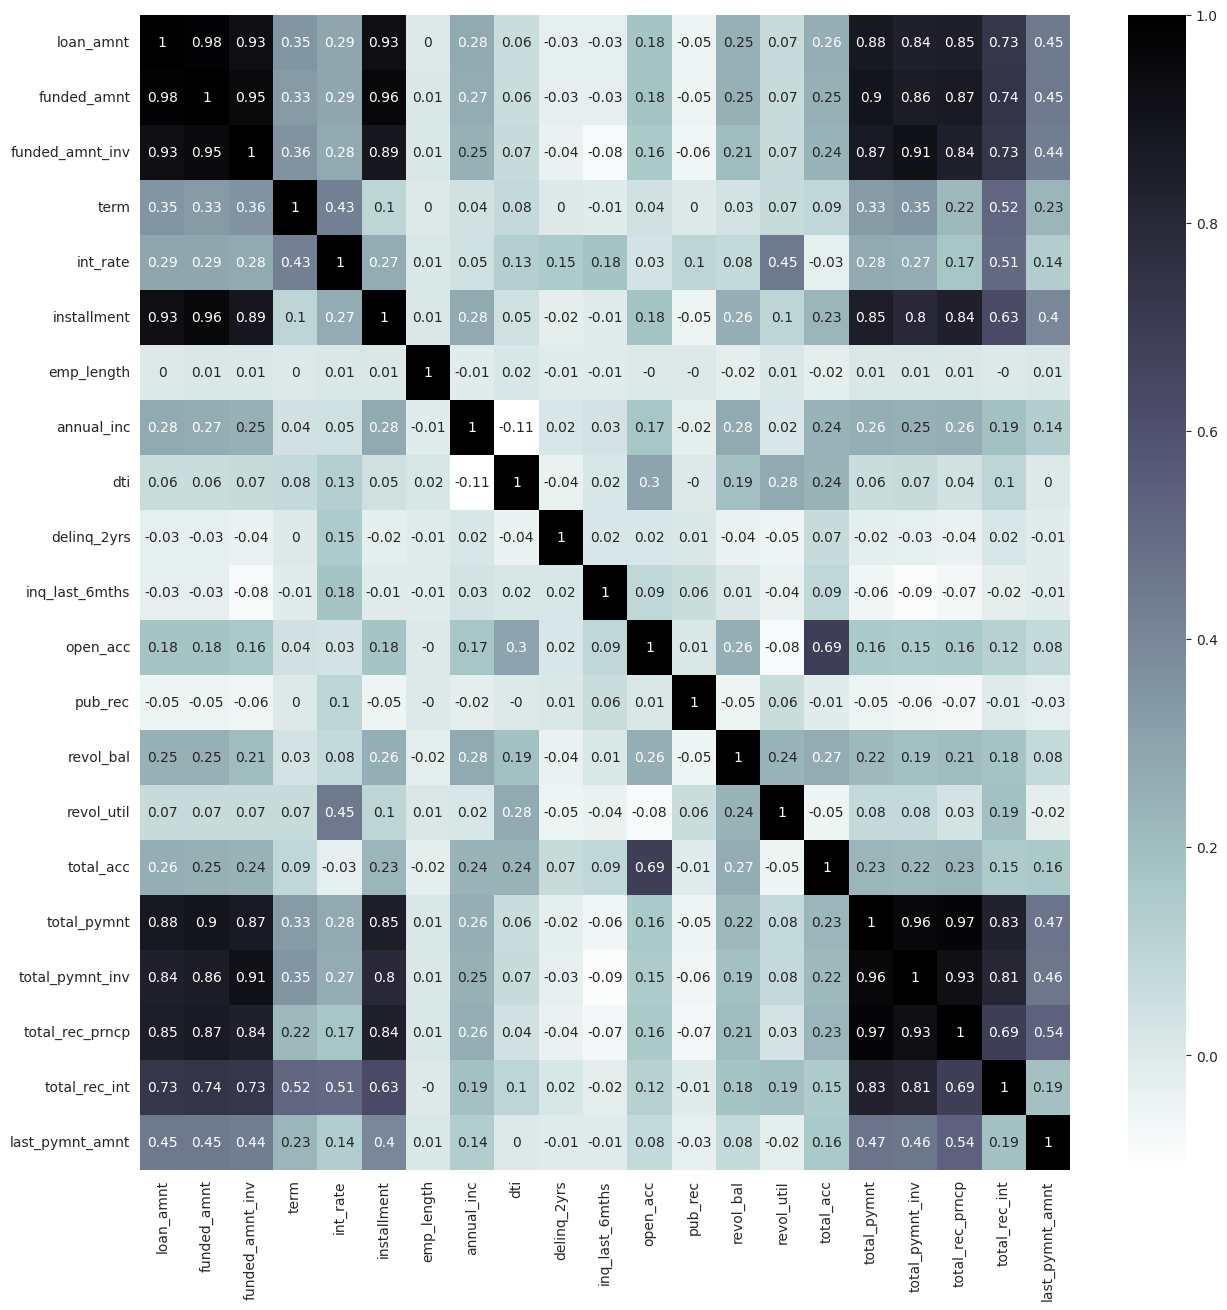

In [ ]:
#heatmapping correlations between columns (without catagorized columns)

corr= clean_df.select_dtypes(include='float64').corr().round(2)

plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'bone_r', annot=True)
plt.show()

Insights from EDA

*   Kami melihat tingkat gagal bayar secara keseluruhan sebesar 15%
*   Orang yang tidak memiliki rumah cenderung gagal bayar pada tingkat yang lebih tinggi
*   Pinjaman untuk usaha kecil dan pendidikan memiliki risiko gagal bayar yang lebih tinggi



# Modelling

Standardizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scaled_df = scalar.fit_transform(clean_df)
df_feat = pd.DataFrame(scaled_df, columns=clean_df.columns)
df_feat.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,-1.498230,-1.515651,-1.424013,-0.588034,-3.254756,-1.545617,-0.660327,0.964831,-1.070128,-1.016639,...,-2.077157,-0.235659,-0.651317,-1.726637,-1.821535,-1.330262,-1.260286,-1.367966,-0.868744,-0.595293
1,-1.160630,-1.165838,-1.073276,-0.588034,0.485820,-1.137072,0.495468,0.964831,-0.759863,-1.016639,...,-0.520896,-0.235659,-0.606604,-0.976572,-1.044890,-0.988800,-0.916525,-1.013439,-0.644905,-0.574607
2,-0.823031,-0.816025,-0.722539,-0.588034,1.012926,-0.705427,0.495468,0.964831,-0.155029,-1.016639,...,-0.520896,-0.235659,0.204337,1.791274,-0.613420,-1.002850,-0.930669,-1.097246,-0.528755,-0.555294
3,-0.552951,-0.536174,-0.441949,-0.588034,-0.603175,-0.466719,-1.045592,-1.104085,-0.235744,-1.016639,...,-0.520896,-0.235659,-0.502320,-0.064521,-0.181951,-0.432843,-0.356822,-0.375290,-0.447599,-0.242306
4,-1.228150,-1.235801,-1.143423,-0.588034,-1.804547,-1.257120,-1.045592,0.964831,-0.604823,-1.016639,...,-0.520896,-0.235659,-0.651317,-1.726637,-0.613420,-1.090244,-1.018652,-1.084345,-0.805844,-0.583198


In [ ]:
#preparing train test data
from sklearn.model_selection import train_test_split

X = df_feat
y = df['repay_fail']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# List of classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("KNN", KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("SVC", SVC(random_state=42, probability=True)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
]

In [ ]:
# Membuat daftar untuk nama pengklasifikasi, mean_test_f1_scores, cross_val_errors, dan hasil.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold, cross_validate

results = []
mean_test_f1_scores = []
cross_val_errors = []
classifier_names = []

for model_name, model in classifiers:

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Melakukan validasi silang dengan skor data train
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1, return_train_score=True)

    # Hitung kesalahan cross-validation
    cross_val_error = 1 - np.mean(cv_results['test_score'])

    # Menambahkan hasil ke daftar
    results.append({
        "Model Name": model_name,
        "Mean Train F1 Score": np.mean(cv_results['train_score']),
        "Mean Test F1 Score": np.mean(cv_results['test_score']),
        "Cross-Validation Error": cross_val_error
    })
    mean_test_f1_scores.append(np.mean(cv_results['test_score']))
    cross_val_errors.append(cross_val_error)
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)



,Model Name,Mean Train F1 Score,Mean Test F1 Score,Cross-Validation Error
0,Logistic Regression,0.988851,0.988296,0.011704
1,KNN,0.945145,0.919024,0.080976
2,Gaussian Naive Bayes,0.913012,0.912528,0.087472
3,SVC,0.992969,0.984015,0.015985
4,Decision Tree,1.000000,1.000000,0.000000
5,Random Forest,1.000000,0.998792,0.001208
6,AdaBoost,1.000000,1.000000,0.000000
7,Gradient Boosting,1.000000,1.000000,0.000000
8,LightGBM,1.000000,1.000000,0.000000
9,XGBoost,1.000000,0.999879,0.000121


Mean Test F1 Scores by Classifiers

In [ ]:
# Creating a DataFrame for mean test F1 score and cross-validation error
import plotly.subplots as sp
import plotly.graph_objects as go

data = pd.DataFrame({
    'Classifier': classifier_names,
    'Mean Test F1 Score': mean_test_f1_scores,
    'Cross-Validation Error': cross_val_errors
})

# Creating Plotly subplots with two columns and one row
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Mean Test F1 Scores', 'Cross-Validation Error'],
                       vertical_spacing=0.1, horizontal_spacing=0.20)

# Adding bar chart for Mean Test F1 Score
fig.add_trace(go.Bar(x=data['Mean Test F1 Score'], y=data['Classifier'], orientation='h',
                     text=data['Mean Test F1 Score'], marker=dict(color=data['Mean Test F1 Score'], colorscale='RdBu'),
                     showlegend=False),
              row=1, col=1)

# Sort the DataFrame by Cross-Validation Error in descending order
data = data.sort_values(by='Cross-Validation Error', ascending=False)

# Adding bar chart for Cross-Validation Error
fig.add_trace(go.Bar(x=data['Cross-Validation Error'], y=data['Classifier'], orientation='h',
                     text=data['Cross-Validation Error'], marker=dict(color=data['Cross-Validation Error'], colorscale='RdBu'),
                     showlegend=False),
              row=1, col=2)

# Customizing the layout
fig.update_layout(title='Model Evaluation Metrics', xaxis=dict(range=[0, 1]), yaxis=dict(categoryorder='total ascending'),
                 template='plotly_dark')

fig.show()

In [ ]:
import warnings
import lightgbm as lgb

# Membuat model dengan verbosity=-1 untuk menghilangkan peringatan
model = lgb.LGBMClassifier(verbosity=-1)
# Menghilangkan peringatan dari LightGBM
warnings.filterwarnings("ignore", category=Warning)


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Definisikan list model dan nama model
models = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), LGBMClassifier(), XGBClassifier()]
model_names = ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost']

# Inisialisasi list untuk menyimpan hasil evaluasi
eval_results = []

# Lakukan iterasi untuk setiap model
for model, model_name in zip(models, model_names):
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Buat classification report
    cr = classification_report(y_test, y_pred)

    # Buat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Tambahkan hasil evaluasi ke dalam list
    eval_results.append({
        "Model Name": model_name,
        "Classification Report": cr,
        "Confusion Matrix": cm
    })

# Tampilkan hasil evaluasi
for result in eval_results:
    print("Evaluation for", result["Model Name"])
    print("Classification Report:")
    print(result["Classification Report"])
    print("Confusion Matrix:")
    print(result["Confusion Matrix"])
    print("\n")


[LightGBM] [Info] Number of positive: 4145, number of negative: 22791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3759
[LightGBM] [Info] Number of data points in the train set: 26936, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153883 -> initscore=-1.704463
[LightGBM] [Info] Start training from score -1.704463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

# Save Model

In [ ]:
# Simpan model ke dalam file
import joblib

joblib.dump(model, 'Fintech_model_ML.pkl')

['Fintech_model_ML.pkl']